<a href="https://www.kaggle.com/code/anandtalware/laptop-price-prediction?scriptVersionId=165214542" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptoppriceprediction/Laptop_price.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_csv('/kaggle/input/laptoppriceprediction/Laptop_price.csv')
data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [4]:
data.shape

(1000, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [6]:
data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


## Exploratory Data Analysis

#### 1. Univariate Data Analysis

In [7]:
# Brand columns
data['Brand'].value_counts()

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

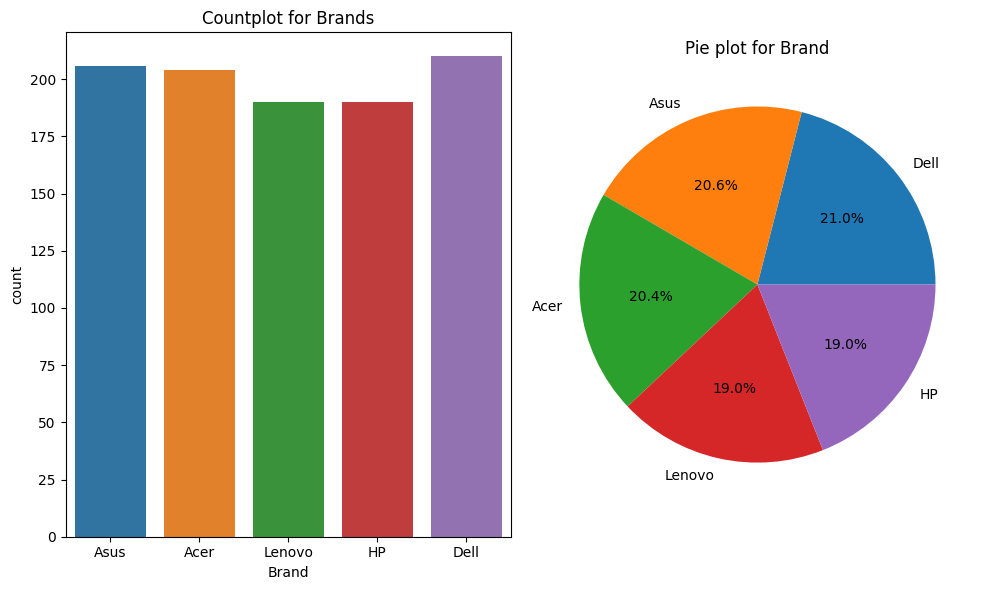

In [8]:
fig , ax = plt.subplots(1,2, figsize=(10,6))
# countplot
sns.countplot(x=data['Brand'], ax= ax[0])
ax[0].set_title("Countplot for Brands")

ax[1].pie(x= data['Brand'].value_counts(), labels= data['Brand'].value_counts().index, autopct= '%1.1f%%')
ax[1].set_title('Pie plot for Brand')

plt.tight_layout()
plt.show()

In [9]:
def univariate_analysis_numerical(col):
    fig, ax = plt.subplots(1,2, figsize=(10,6))
    
    # histogram
    sns.histplot(x=data[col], bins=30, kde=True, ax=ax[0] )
    ax[0].set_title(f'Distribution of {col} of Laptop')
    
    # boxplot
    sns.boxplot(x=data[col], ax=ax[1])
    ax[1].set_title(f'Boxplot for {col}')
    
    plt.tight_layout()
    plt.show()

In [10]:
data.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

In [11]:
num_cols = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price']



In [12]:
skew_data = {}
for col in num_cols:
    skew_value = data[col].skew()
    if skew_value > 0.5:
        skewness = 'Right Skewed'
    elif skew_value < -0.5:
        skewness = 'Left Skewed'
    elif skew_value == 0:
        skewness = 'Normal Disributed'
    else:
        skewness = 'Aproximate Normal'
        
    skew_data[col] = [skew_value, skewness]
    
skewness_df = pd.DataFrame(skew_data, index=['Skew_Value','Skewness'])
skewness_df.T

,Skew_Value,Skewness
Processor_Speed,-0.015648,Aproximate Normal
RAM_Size,0.572614,Right Skewed
Storage_Capacity,0.368301,Aproximate Normal
Screen_Size,-0.066254,Aproximate Normal
Weight,0.019275,Aproximate Normal
Price,0.366281,Aproximate Normal


In [13]:
data['RAM_Size'].value_counts()

RAM_Size
32    274
8     246
4     243
16    237
Name: count, dtype: int64

In [14]:
# we change the data type of RAM_Size
data['RAM_Size'] = data['RAM_Size'].astype('O')
data['RAM_Size'].dtype

dtype('O')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   object 
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 54.8+ KB


In [16]:
num_cols = ['Processor_Speed', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price']

****-- Processor_Speed --****


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


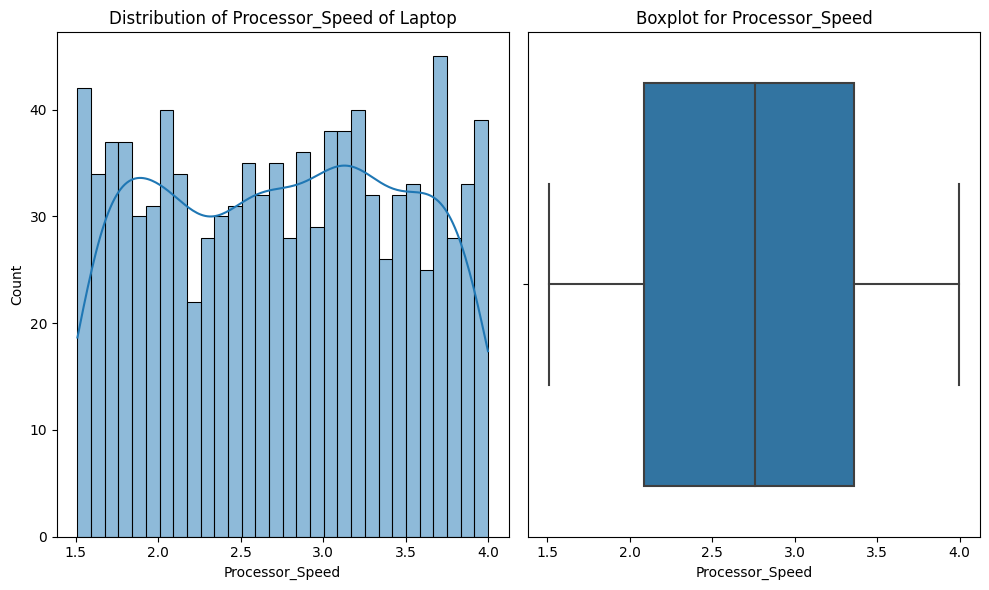

****-- Storage_Capacity --****


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


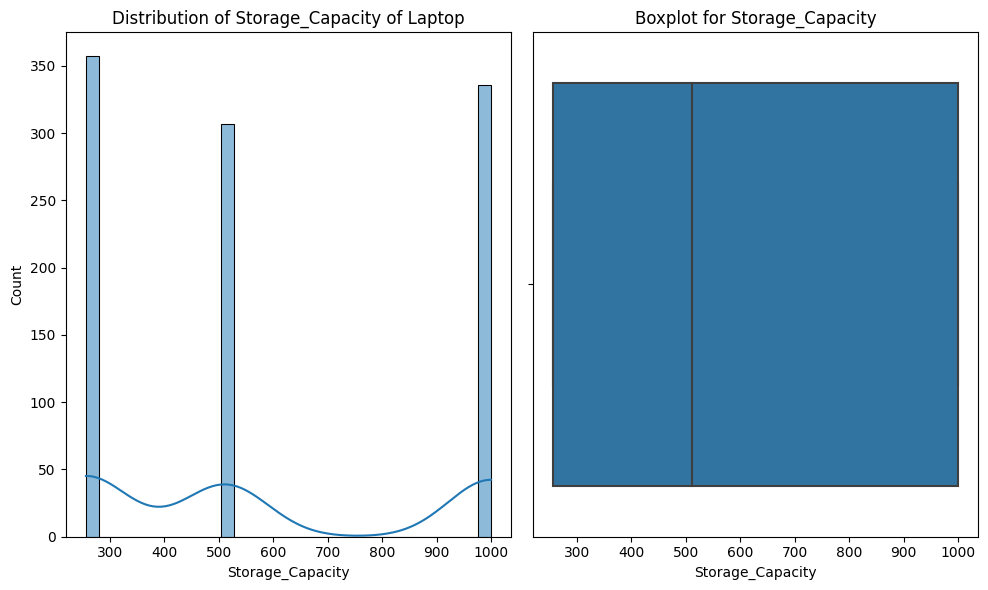

****-- Screen_Size --****


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


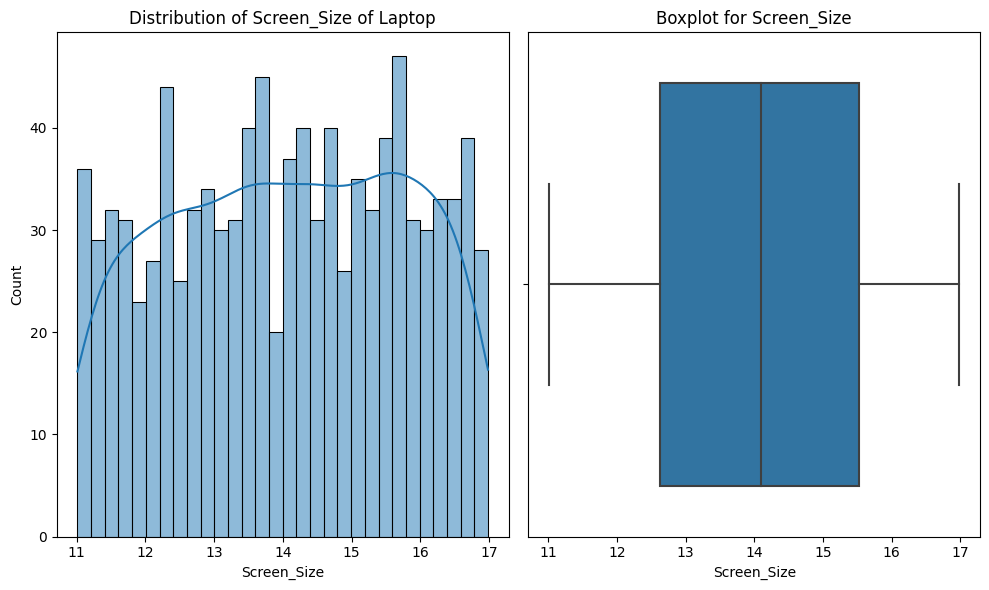

****-- Weight --****


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


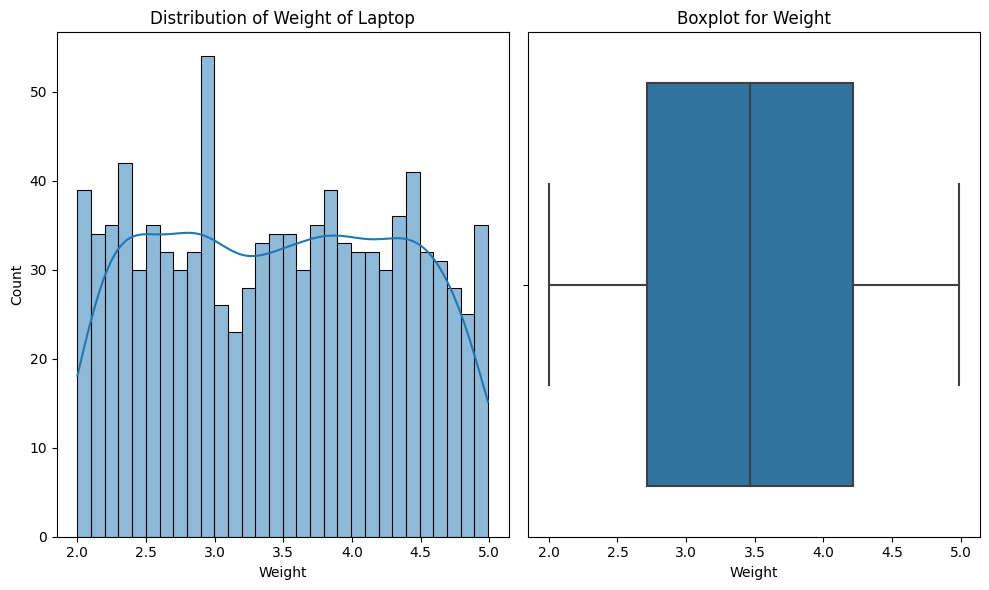

****-- Price --****


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


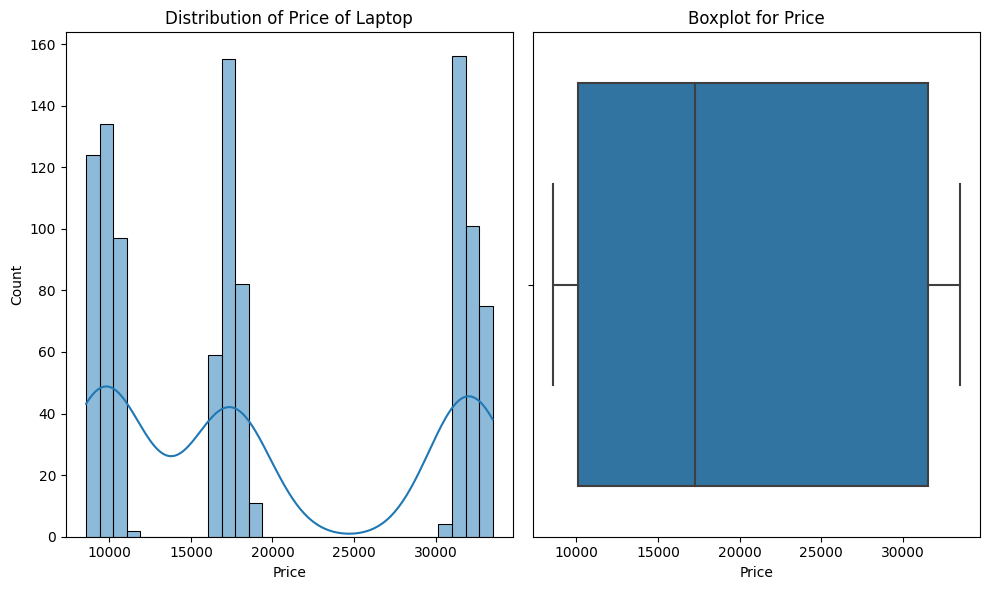

In [17]:
for col in num_cols:
    print(f"****-- {col} --****")
    univariate_analysis_numerical(col)
    print('==='*30)

### Bivariate Analysis

In [18]:
# numerical col with target col Price
def bivariate_analysis_num(col):
    print(f"***-- {col} --***")
    fig , ax = plt.subplots(1,2, figsize=(10,6))
    #regplot
    sns.regplot(x=data[col], y = data['Price'], ax= ax[0])
    ax[0].set_title(f'Regression plot between {col} vs Price.')
    
    # Heatmap
    heatmap_data = data[[col, 'Price']].corr()
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=ax[1])
    ax[1].set_title(f'Correlation Heatmap: {col} vs Price')
    plt.tight_layout()
    plt.show()
    
    print('==='*30)


***-- Processor_Speed --***


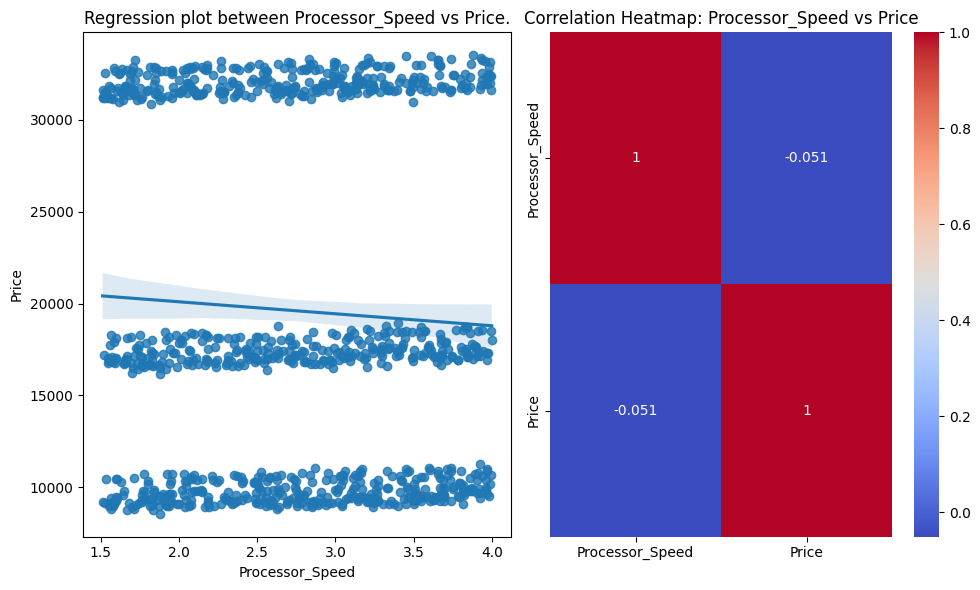

***-- Storage_Capacity --***


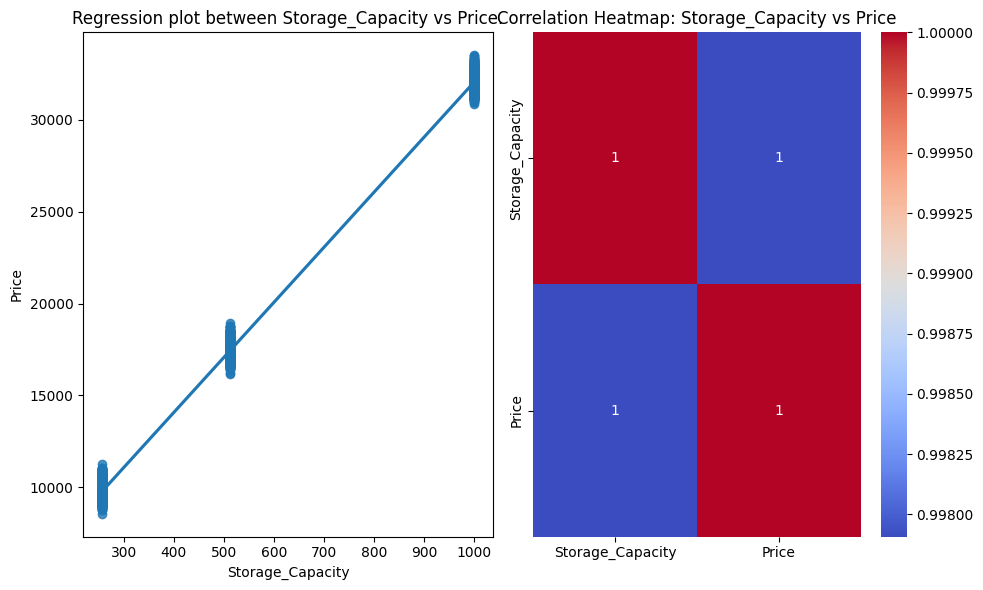

***-- Screen_Size --***


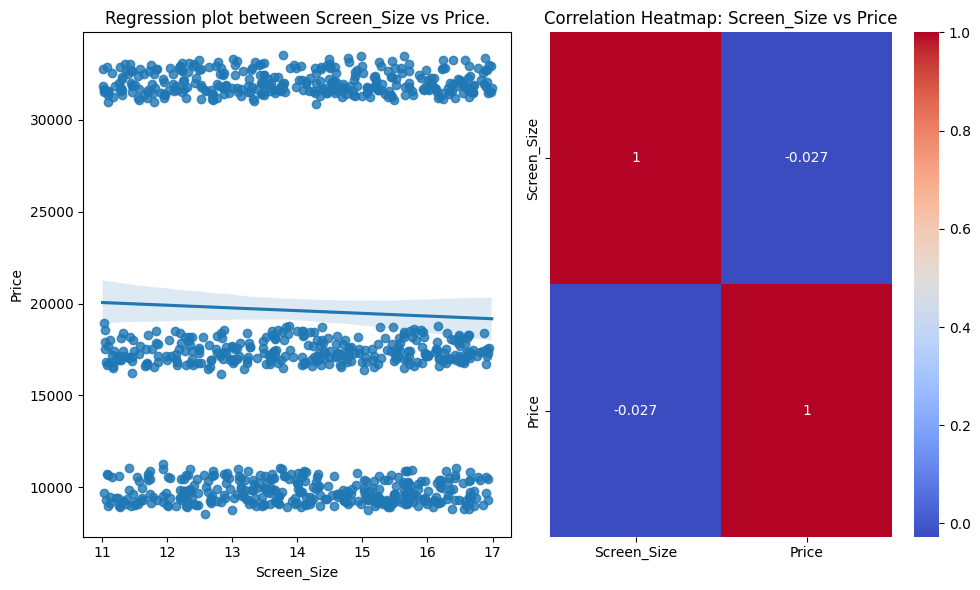

***-- Weight --***


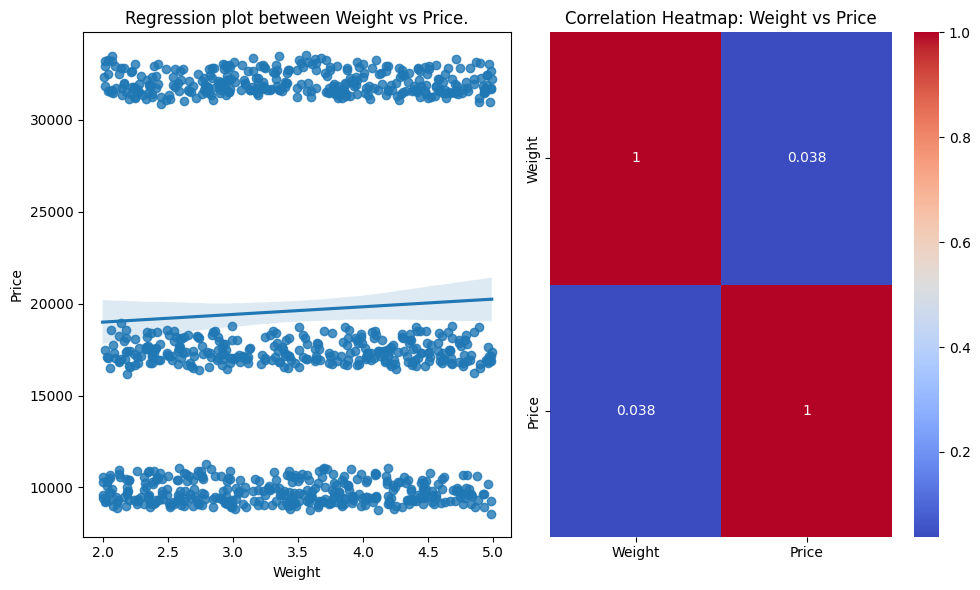

***-- Price --***


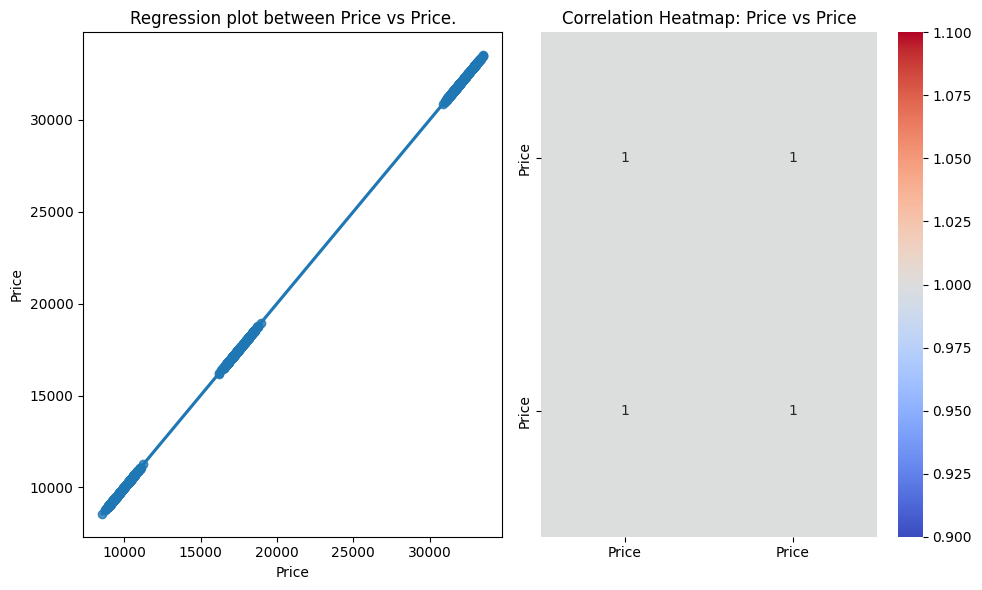

In [19]:
for col in num_cols:
    bivariate_analysis_num(col)

In [20]:
# bivariate analysis between categorical and numerical target column Price
def bivariate_analysis_cat(col):
    print(f'***-- {col} --***')
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    # Bar Plot
    sns.barplot(x=col, y='Price', data=data, ax=ax[0])
    ax[0].set_title(f'Average Price by {col}')

    # Box Plot
    sns.boxplot(x=col, y='Price', data=data, ax=ax[1])
    ax[1].set_title(f'Price Distribution by {col}')
    
    plt.tight_layout()
    plt.show()
    print('==='*30)

***-- Brand --***


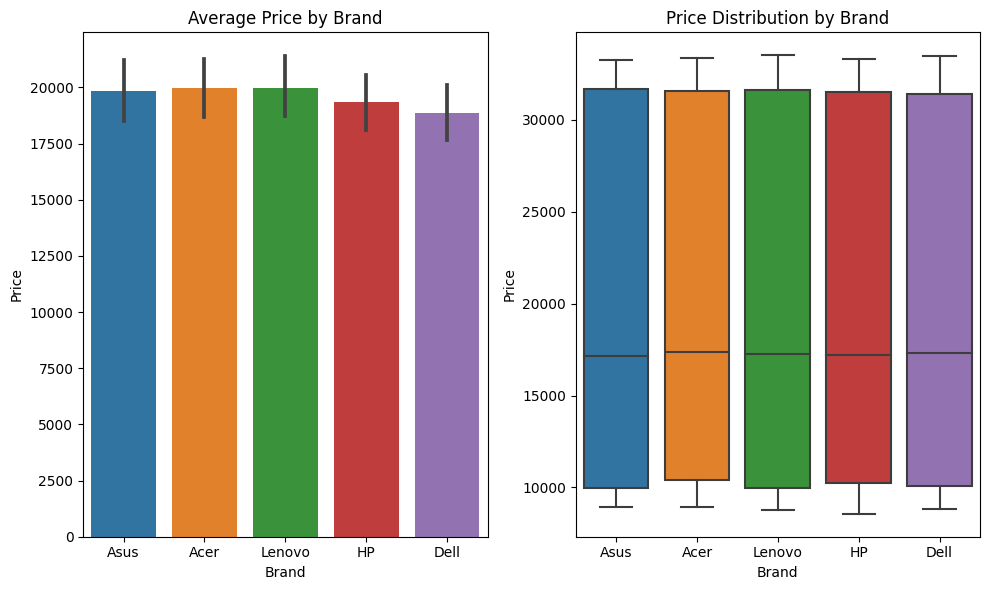

***-- RAM_Size --***


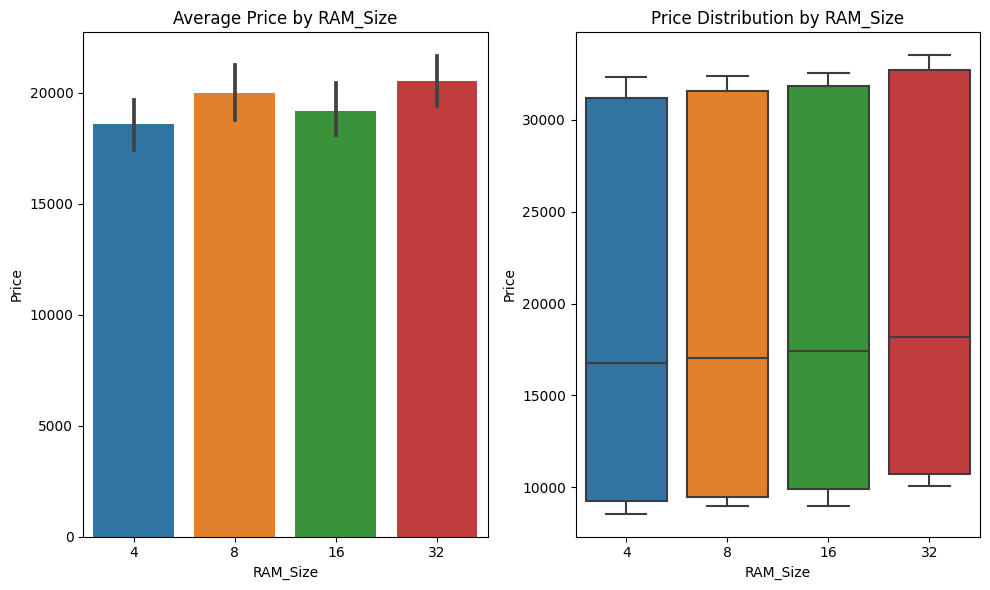

In [21]:
cat_cols = ['Brand', 'RAM_Size']
for col in cat_cols:
    bivariate_analysis_cat(col)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

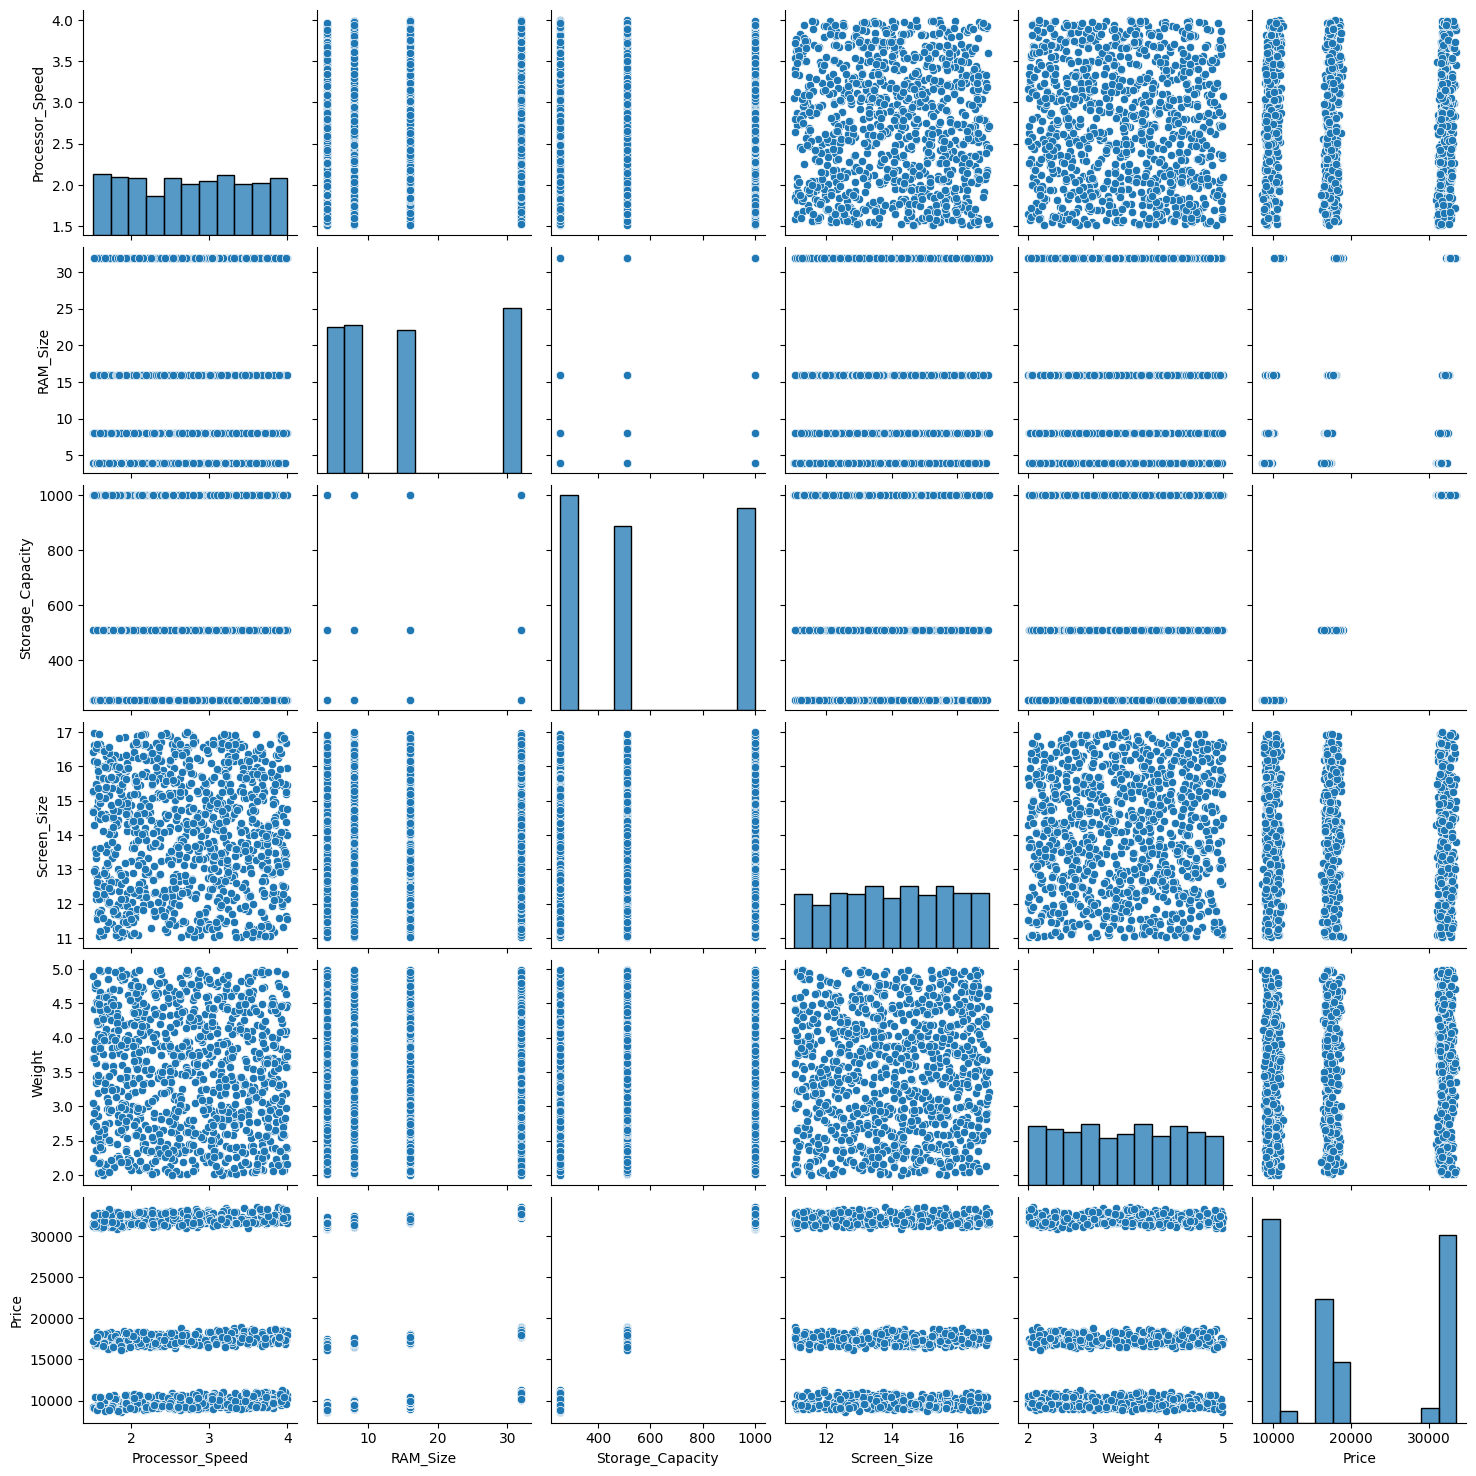

In [22]:
#### Multivariate analysis
sns.pairplot(data)

<Axes: >

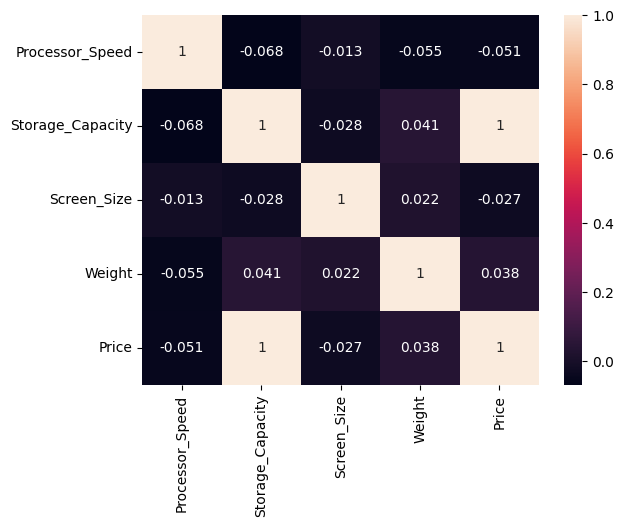

In [23]:
cor = data[num_cols].corr()
sns.heatmap(cor, annot=True)

In [24]:
data.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [25]:
data.duplicated().sum()

0

## Split data as dependent and independent data

In [26]:
X = data.drop('Price', axis=1)
y = data['Price']

In [27]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (750, 6)
Shape of X_test:  (250, 6)
Shape of y_train:  (750,)
Shape of y_test:  (250,)


In [28]:
X_train.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight'],
      dtype='object')

In [29]:
num_cols = [ 'Processor_Speed', 'Storage_Capacity',
       'Screen_Size', 'Weight']

In [30]:
cat_cols

['Brand', 'RAM_Size']

### Create Pipelines for both numerical and categorical columns 

In [31]:
# Create transformers for numerical and categorical columns
num_pipeline = Pipeline(steps=[
                              ('scaler', StandardScaler()) 
                             ])

cat_pipeline = Pipeline(steps=[
                            ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'))
                             ])


In [32]:
# column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ])

In [33]:
# create a fuction which eavaluate machine learnig models 
def model_evaluation(models):
    for model in models.values():
        pipeline = Pipeline(steps=[
                    ('Preprocessor', preprocessor),
                    ('model', model)
               ])
        pipeline.fit(X_train, y_train)
        
        # training performance
        print(f'Training performance for {model}:')
        y_train_pred = pipeline.predict(X_train)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mse_train = mean_squared_error(y_train, y_train_pred)
        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        r2_train = r2_score(y_train, y_train_pred)
        
        print(f'Mean Absolute Errorfor training: {mae_train}')
        print(f'Mean Squared Error for training: {mse_train}')
        print(f'Root Mean Squared Error training : {rmse_train}')
        print(f'R-squared for trainig: {r2_train}')
        
        print('--'*20)
        # test performance
        print(f'Test performance for {model}:')
        y_pred = pipeline.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        print(f'Mean Absolute Error: {mae}')
        mse = mean_squared_error(y_test, y_pred)
        print(f'Mean Squared Error: {mse}')
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        print(f'Root Mean Squared Error: {rmse}')
        r2 = r2_score(y_test, y_pred)
        print(f'R-squared: {r2}')
        
        print('==='*35)


In [34]:
models = {'Linear Regression': LinearRegression(),
          'Knn_regressor': KNeighborsRegressor(),
          'Decision Tree Regressor': DecisionTreeRegressor(),
          'Random Forest': RandomForestRegressor(),
          'SVM': SVR()}

In [35]:
model_evaluation(models)

Training performance for LinearRegression():
Mean Absolute Errorfor training: 155.41888897993746
Mean Squared Error for training: 38825.07110241521
Root Mean Squared Error training : 197.04078537809173
R-squared for trainig: 0.9995640451362016
----------------------------------------
Test performance for LinearRegression():
Mean Absolute Error: 145.9781413110629
Mean Squared Error: 36841.4151760501
Root Mean Squared Error: 191.9411763433008
R-squared: 0.9995734178019886
Training performance for KNeighborsRegressor():
Mean Absolute Errorfor training: 1176.0205568835602
Mean Squared Error for training: 3053040.364119272
Root Mean Squared Error training : 1747.295156554631
R-squared for trainig: 0.9657183423412169
----------------------------------------
Test performance for KNeighborsRegressor():
Mean Absolute Error: 1304.1843352127896
Mean Squared Error: 3353130.6184398984
Root Mean Squared Error: 1831.1555418477967
R-squared: 0.9611745145348456
Training performance for DecisionTreeRegr

# Conclusion on model evaluation:
- Here we have  poor result on SVR() machine learning model.
- DecisionTreeRegressor, RandomForestREgressor and LinearRegression gives best result.

In [36]:
# select Random Forest Regressor model with all pipeline
# Create transformers for numerical and categorical columns
num_pipeline = Pipeline(steps=[
                              ('scaler', StandardScaler()) 
                             ])

cat_pipeline = Pipeline(steps=[
                            ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'))
                             ])

model = RandomForestRegressor() # RandomForest regressor model

# column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ])

pipeline = Pipeline(steps=[
                    ('Preprocessor', preprocessor),
                    ('model', model)
               ])
pipeline.fit(X_train, y_train)

# training performance
print(f'Training performance for {model}:')
y_train_pred = pipeline.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
print(f'Mean Absolute Errorfor training: {mae_train}')
print(f'Mean Squared Error for training: {mse_train}')
print(f'Root Mean Squared Error training : {rmse_train}')
print(f'R-squared for trainig: {r2_train}')

print('--'*20)
# test performance
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Test performance for {model}:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

print('==='*35)

Training performance for RandomForestRegressor():
Mean Absolute Errorfor training: 65.20851167755762
Mean Squared Error for training: 6739.3426663301125
Root Mean Squared Error training : 82.0934995376011
R-squared for trainig: 0.9999243259798175
----------------------------------------
Test performance for RandomForestRegressor():
Mean Absolute Error: 169.85984359300025
Mean Squared Error: 47399.18859687516
Root Mean Squared Error: 217.7135471138054
R-squared: 0.9994511706469745


In [37]:
# We store our machine learning model in pkl file
import joblib
joblib.dump(model, 'laptop_price_predictor_rfr.pkl')

['laptop_price_predictor_rfr.pkl']